Goal of the project - identifying characteristics that are associated with a person making more or less than $50,000 per year

Initial thoughts - predictions are needed but feature importance is important - more about insight for feature importance than generating predictions.

Initial findings - we are missing all column names. Metadata file contains inaccuracies in column namings and columns included with the data.


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv('../data/census_income_learn.csv', header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


Column names are not included in the csv, and we have 42 features, not the 40 described in the metadata

In [3]:
column_names = pd.read_csv('../data/census_income_metadata.txt', 
                           sep='|',
                           header = None
                           )[1].iloc[23:68].str.split('\t',
                                                      n = 1,
                                                      expand = True
                                                      )[0].str.lstrip().str.replace("'","")
column_names = column_names[(column_names != 'adjusted gross income') &
                            (column_names != 'federal income tax liability') &
                             (column_names != 'total person earnings') & 
                             (column_names != 'total person income') &
                             (column_names != 'taxable income amount')].reset_index(drop = True)
column_names = list(column_names)
column_names[10] = 'race'
column_names.extend(['year', 'income'])
df.columns = column_names

In [4]:
df.head()

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
#Perhaps worth making a data dictionary to track observed values
data_dictionary = {}
for i in df.columns:
    data_dictionary[i] = {'no_of_distinct_values': df[i].nunique(), 'distinct_values': list(df[i].unique())}

for i in df.columns:
    print(i, df[i].unique())

In [6]:
df['migration code-change in msa'].value_counts(normalize=True)

 ?                   0.499672
 Nonmover            0.413677
 MSA to MSA          0.053132
 NonMSA to nonMSA    0.014089
 Not in universe     0.007598
 MSA to nonMSA       0.003959
 NonMSA to MSA       0.003082
 Abroad to MSA       0.002270
 Not identifiable    0.002155
 Abroad to nonMSA    0.000366
Name: migration code-change in msa, dtype: float64

In [7]:
df['migration code-change in reg'].value_counts(normalize=True)


 ?                                 0.499672
 Nonmover                          0.413677
 Same county                       0.049177
 Different county same state       0.014018
 Not in universe                   0.007598
 Different region                  0.005904
 Different state same division     0.004967
 Abroad                            0.002656
 Different division same region    0.002331
Name: migration code-change in reg, dtype: float64

In [8]:
df['migration code-move within reg'].value_counts(normalize=True)

 ?                               0.499672
 Nonmover                        0.413677
 Same county                     0.049177
 Different county same state     0.014018
 Not in universe                 0.007598
 Different state in South        0.004877
 Different state in West         0.003403
 Different state in Midwest      0.002762
 Abroad                          0.002656
 Different state in Northeast    0.002160
Name: migration code-move within reg, dtype: float64

In [9]:
df['migration prev res in sunbelt'].value_counts(normalize=True)

 ?                  0.499672
 Not in universe    0.421275
 No                 0.050054
 Yes                0.028999
Name: migration prev res in sunbelt, dtype: float64

In [10]:
df['live in this house 1 year ago'].value_counts()

 Not in universe under 1 year old    101212
 Yes                                  82538
 No                                   15773
Name: live in this house 1 year ago, dtype: int64

All of the migration attributes have a large number of missing values (almost 50%), from the paper this appears to be explained by the fact that the data was collected over 2 years
and not all of the people interviewed were interviewed in both years.

The feature 'live in this house 1 year ago' is complete and could be used instead of these migration features given the data we have is from two successive years.

I'm planning to build an initial model without these migration columns due to the amount of missing data, we can always look to include these later if I believe the model performance could be improved with their inclusion.

This also seems to imply that there is a lot of possible duplication within the dataset. 
In fact we can see from the metadata txt file that
- Number of instances data = 199523
- - Duplicate or conflicting instances : 46716
- Number of instances in test = 99762
- - Duplicate or conflicting instances : 20936


<br />I don't know that we need to remove duplicates here as each record seems to be a valid record and without a unique identifier we could have multiple people with the same records legitimately. 

In [11]:
df['income'].value_counts(normalize=True)

 - 50000.    0.937942
 50000+.     0.062058
Name: income, dtype: float64

In [12]:
df['country of birth father'].value_counts(normalize=True)

 United-States                   0.797718
 Mexico                          0.050160
 ?                               0.033645
 Puerto-Rico                     0.013432
 Italy                           0.011086
 Canada                          0.006916
 Germany                         0.006796
 Dominican-Republic              0.006465
 Poland                          0.006074
 Philippines                     0.005784
 Cuba                            0.005638
 El-Salvador                     0.004922
 China                           0.004290
 England                         0.003974
 Columbia                        0.003077
 India                           0.002907
 South Korea                     0.002656
 Ireland                         0.002546
 Jamaica                         0.002321
 Vietnam                         0.002290
 Guatemala                       0.002230
 Japan                           0.001965
 Portugal                        0.001945
 Ecuador                         0

In [13]:
len(df[df['country of birth mother'] == ' ?'])

6119

In [14]:
df['country of birth mother'].value_counts(normalize=True)

 United-States                   0.804313
 Mexico                          0.049022
 ?                               0.030668
 Puerto-Rico                     0.012395
 Italy                           0.009242
 Canada                          0.007272
 Germany                         0.006927
 Philippines                     0.006170
 Poland                          0.005563
 El-Salvador                     0.005553
 Cuba                            0.005553
 Dominican-Republic              0.005528
 England                         0.004526
 China                           0.003809
 Columbia                        0.003067
 South Korea                     0.003052
 Ireland                         0.003002
 India                           0.002912
 Vietnam                         0.002371
 Japan                           0.002351
 Jamaica                         0.002270
 Guatemala                       0.002225
 Ecuador                         0.001879
 Peru                            0

In [15]:
df[df['country of birth father'] == ' ?']['citizenship'].value_counts()

 Native- Born in the United States              3484
 Foreign born- Not a citizen of U S             1939
 Foreign born- U S citizen by naturalization    1077
 Native- Born abroad of American Parent(s)       181
 Native- Born in Puerto Rico or U S Outlying      32
Name: citizenship, dtype: int64

In [16]:
df[df['country of birth mother'] == ' ?']['citizenship'].value_counts()

 Native- Born in the United States              2914
 Foreign born- Not a citizen of U S             1933
 Foreign born- U S citizen by naturalization    1051
 Native- Born abroad of American Parent(s)       207
 Native- Born in Puerto Rico or U S Outlying      14
Name: citizenship, dtype: int64

At first I thought to impute the missing parent birth location with information gained from the citizenship feature (for example if the citizenship was 'Born abroad of American Parent(s)) however on second thoughts someone could have American parents who were born abroad. 


It may be better to impute the modal value for these cases of missing data as the amount of missing data is small (<3.5%). 
In reality missing data here might signify a different country of birth but we don't have enough information to make this leap.


In [17]:
df['country of birth self'].value_counts(normalize=True).head()

 United-States    0.887061
 Mexico           0.028904
 ?                0.017006
 Puerto-Rico      0.007017
 Germany          0.004265
Name: country of birth self, dtype: float64

In [18]:
df[df['country of birth self'] == ' ?'].citizenship.value_counts()

 Foreign born- Not a citizen of U S             1972
 Foreign born- U S citizen by naturalization    1046
 Native- Born abroad of American Parent(s)       375
Name: citizenship, dtype: int64

Likewise we have a small number of missing values in the 'country of birth self' column however looking at the citizenship feature for these records show that all were born abroad so we will impute a new value here 'Born abroad'

In [19]:
df.select_dtypes(exclude='object').describe()

,age,industry code,occupation code,wage per hour,capital gains,capital losses,divdends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


The monetary features are heavily skewed - <25% of participants have any capital gains, losses or dividends. 

In [20]:
df[df['capital gains'] > 25000]['capital gains'].value_counts()

99999    390
27828     94
25236     23
25124     18
34095     11
41310      2
Name: capital gains, dtype: int64

In [21]:
df[df['capital gains'] > 50000].head(7)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,income
780,47,Private,29,2,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,50000+.
811,33,Private,9,36,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,50000+.
833,34,Private,35,17,Bachelors degree(BA AB BS),0,Not in universe,Never married,Finance insurance and real estate,Sales,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,39,94,50000+.
1043,41,Private,34,17,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,50000+.
1713,56,Self-employed-incorporated,42,7,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Medical except hospital,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,50000+.
2581,39,Private,40,3,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Entertainment,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,50000+.
3248,47,Private,9,35,Associates degree-academic program,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,50000+.


While it may have initially looked farfetched to have capital gains of 9999, from a brief look at those with this value we can see highly educated people working in a number of industries/occupations that could mean this is a reasonable value. 

There could be a number of reasons for a group of records with the same maximum - this could be the limit on the entry form, they could be limiting the amount of capital gains for tax efficiency... 

It is better to leave these values in for now as without further domain knowledge any assumptions made could be false. 

In [22]:
df['num persons worked for employer'].unique()

array([0, 1, 6, 4, 5, 3, 2])

Age I can continue to treat as numerical, along with wage, capital gains, losses, dividends, instance weight(*).

The age feature and monetary features have  differing scales so I will carry out preprocessing on these. 

Weeks worked in year are numerical but really should be categorical as they are discrete. 

Having looked at the questionaire - the Num persons feature is a categorical binned feature so this should be encoded categorical.

The other features listed as numerical are actually categorical features that I will look to transform to categorical. 

In [23]:
fig = px.imshow(df.corr())
fig.show();

Of the actual numerical features, I was expecting to see some correlation between the monetary features however there is almost no correlation between these features. 

There are some interesting correlations between the categorical features here - notable interactions are veterans benefits and age, industry & occupation with weeks worked in a year and the number of employer workers and weeks worked in a year. 

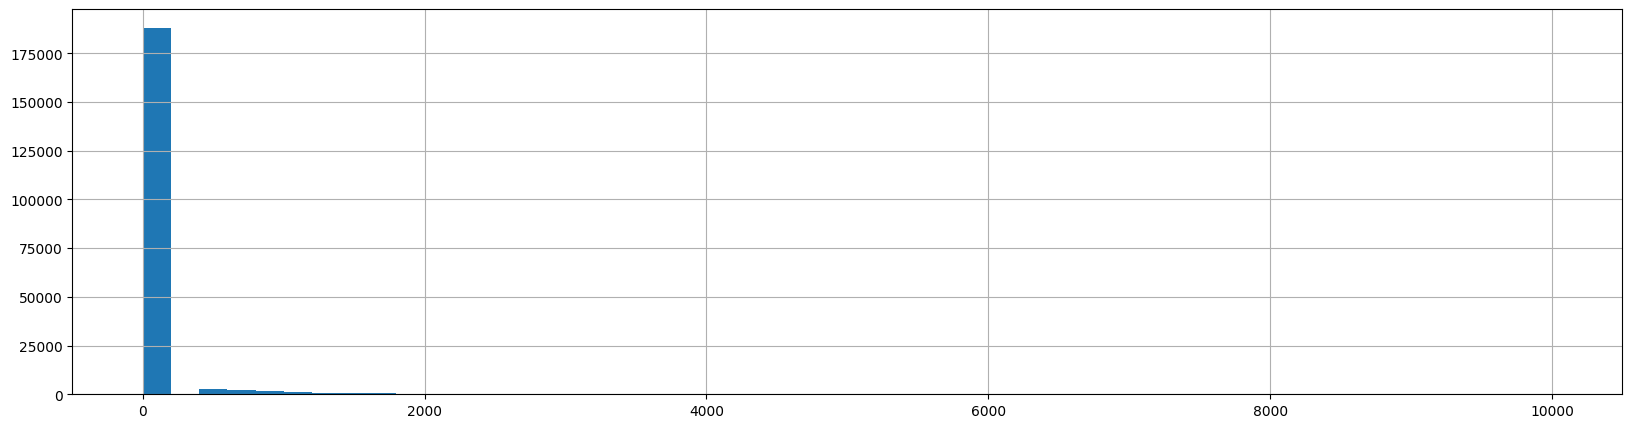

In [24]:
df['wage per hour'].hist(bins = 50, figsize = (20,5))
plt.show()

The wage per hour feature is tail heavy so I may look to transform this to normalise the distribution. It may also cause data leakage as the wage per hour and working weeks could be strong predictors of income and may not be features available at the point of prediction/in production.

In [25]:
df['veterans benefits'].value_counts()

2    150130
0     47409
1      1984
Name: veterans benefits, dtype: int64

In [26]:
df['own business or self employed'].value_counts()

0    180672
2     16153
1      2698
Name: own business or self employed, dtype: int64

In [27]:
df.select_dtypes(include='object').columns

Index(['class of worker', 'education', 'enrolled in edu inst last wk',
       'marital status', 'major industry code', 'major occupation code',
       'race', 'hispanic Origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'tax filer status', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'family members under 18',
       'country of birth father', 'country of birth mother',
       'country of birth self', 'citizenship',
       'fill inc questionnaire for veterans admin', 'income'],
      dtype='object')

In [28]:
df['class of worker'].value_counts()

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class of worker, dtype: int64

In [29]:
fig = px.bar(df.groupby(['class of worker', 'income']).size().reset_index(name = 'counts'),
             x="class of worker", y="counts", color="income")
fig.show()

Class of worker seems like it may be a useful feature in determining income

In [30]:
df['major industry code'].value_counts()

 Not in universe or children            100684
 Retail trade                            17070
 Manufacturing-durable goods              9015
 Education                                8283
 Manufacturing-nondurable goods           6897
 Finance insurance and real estate        6145
 Construction                             5984
 Business and repair services             5651
 Medical except hospital                  4683
 Public administration                    4610
 Other professional services              4482
 Transportation                           4209
 Hospital services                        3964
 Wholesale trade                          3596
 Agriculture                              3023
 Personal services except private HH      2937
 Social services                          2549
 Entertainment                            1651
 Communications                           1181
 Utilities and sanitary services          1178
 Private household services                945
 Mining      

In [31]:
df['major occupation code'].value_counts()

 Not in universe                          100684
 Adm support including clerical            14837
 Professional specialty                    13940
 Executive admin and managerial            12495
 Other service                             12099
 Sales                                     11783
 Precision production craft & repair       10518
 Machine operators assmblrs & inspctrs      6379
 Handlers equip cleaners etc                4127
 Transportation and material moving         4020
 Farming forestry and fishing               3146
 Technicians and related support            3018
 Protective services                        1661
 Private household services                  780
 Armed Forces                                 36
Name: major occupation code, dtype: int64

Might be worth creating a cross feature from occupation and industry codes

In [32]:
df[['major industry code', 'industry code']].groupby(['industry code', 'major industry code']).size()

industry code  major industry code                 
0               Not in universe or children            100684
1               Agriculture                               827
2               Agriculture                              2196
3               Mining                                    563
4               Construction                             5984
5               Manufacturing-durable goods               553
6               Manufacturing-durable goods               554
7               Manufacturing-durable goods               422
8               Manufacturing-durable goods               550
9               Manufacturing-durable goods               993
10              Manufacturing-durable goods                 4
11              Manufacturing-durable goods              1764
12              Manufacturing-durable goods              1350
13              Manufacturing-durable goods               899
14              Manufacturing-durable goods               295
15              Ma

It appears that industry code and major industry codes relate to the same thing and industry code may be a subset of major industry code. We'll begin by just using the major codes and can revert to a more granular level should we require it.

In [33]:
df['hispanic Origin'].value_counts()

 All other                    171907
 Mexican-American               8079
 Mexican (Mexicano)             7234
 Central or South American      3895
 Puerto Rican                   3313
 Other Spanish                  2485
 Cuban                          1126
 NA                              874
 Do not know                     306
 Chicano                         304
Name: hispanic Origin, dtype: int64

In [34]:
df['race'].value_counts()

 White                          167365
 Black                           20415
 Asian or Pacific Islander        5835
 Other                            3657
 Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64

In [35]:
df[['race', 'hispanic Origin']].groupby(['hispanic Origin', 'race']).size()

hispanic Origin             race                        
 All other                   Amer Indian Aleut or Eskimo      2069
                             Asian or Pacific Islander        5724
                             Black                           19784
                             Other                             750
                             White                          143580
 Central or South American   Amer Indian Aleut or Eskimo         5
                             Asian or Pacific Islander          27
                             Black                             204
                             Other                             467
                             White                            3192
 Chicano                     Amer Indian Aleut or Eskimo         3
                             Other                              42
                             White                             259
 Cuban                       Black                              43
     

I'm going to impute the model value for hispanic origin where either Do Not Know or NA

In [36]:
df['detailed household and family stat'].value_counts()
 #      'detailed household summary in household',

 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
 Child 18+ ever marr Not in a subfamily              1013
 Child under 18 of RP of unrel subfamily              732
 RP of unrelated subfamily                            685
 Child 18+ ever marr RP of subfamily                  671
 Other Rel <18 never marr child of subfamily RP       656
 Other Rel 18+ ever marr RP of subfamily              656
 Other Rel 18+ spouse of subfamily RP                 638
 Child 18+ nev

In [37]:
df['detailed household summary in household'].value_counts()
 #      'detailed household summary in household',

 Householder                             75475
 Child under 18 never married            50426
 Spouse of householder                   41709
 Child 18 or older                       14430
 Other relative of householder            9703
 Nonrelative of householder               7601
 Group Quarters- Secondary individual      132
 Child under 18 ever married                47
Name: detailed household summary in household, dtype: int64

These fields look related so will pick the feature with fewer unique values

In [38]:
df['family members under 18'].value_counts()

 Not in universe           144232
 Both parents present       38983
 Mother only present        12772
 Father only present         1883
 Neither parent present      1653
Name: family members under 18, dtype: int64

In [39]:
df['num persons worked for employer'].astype(str)

0         0
1         1
2         0
3         0
4         0
         ..
199518    0
199519    1
199520    6
199521    0
199522    6
Name: num persons worked for employer, Length: 199523, dtype: object

<AxesSubplot: >

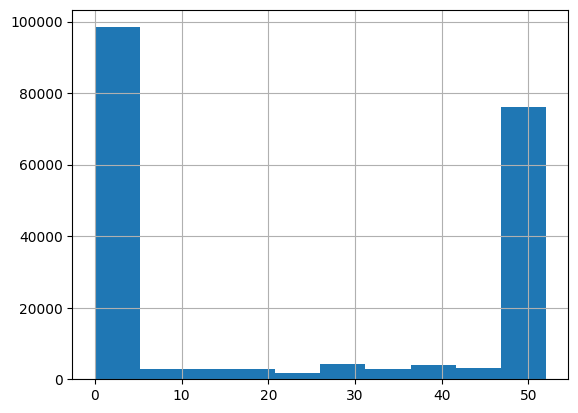

In [40]:
df['weeks worked in year'].hist()

In [41]:
df.groupby(["sex"])["income"].value_counts(normalize=True)

sex      income   
 Female   - 50000.    0.974390
          50000+.     0.025610
 Male     - 50000.    0.898272
          50000+.     0.101728
Name: income, dtype: float64

In [42]:
df['major industry code'].unique()

array([' Not in universe or children', ' Construction', ' Entertainment',
       ' Finance insurance and real estate', ' Education',
       ' Business and repair services', ' Manufacturing-nondurable goods',
       ' Personal services except private HH',
       ' Manufacturing-durable goods', ' Other professional services',
       ' Mining', ' Transportation', ' Wholesale trade',
       ' Public administration', ' Retail trade', ' Social services',
       ' Private household services', ' Utilities and sanitary services',
       ' Communications', ' Hospital services',
       ' Medical except hospital', ' Agriculture',
       ' Forestry and fisheries', ' Armed Forces'], dtype=object)